# Testing new AMM


In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
import sys
sys.path.append('../..')

# Experiments
from model import run
from model import processing
from model.amm.omnipool_amm import OmnipoolState
from model import plot_utils as pu
from model import init_utils



########## AGENT CONFIGURATION ##########
# key -> token name, value -> token amount owned by agent
# note that token name of 'omniABC' is used for omnipool LP shares of token 'ABC'
LP1 = {'omniR1': 500000}
LP2 = {'omniR2': 1500000}
trader = {'LRNA': 1000000, 'R1': 1000000, 'R2': 1000000}

# key -> agent_id, value -> agent dict
agent_d = {'Trader': trader, 'LP1': LP1, 'LP2': LP2}



########## ACTION CONFIGURATION ##########

action_dict = {
    'sell_lrna_for_r1': {'token_buy': 'R1', 'token_sell': 'LRNA', 'amount_sell': 2000, 'action_id': 'Trade', 'agent_id': 'Trader'},
    'sell_r1_for_lrna': {'token_sell': 'R1', 'token_buy': 'LRNA', 'amount_sell': 1000, 'action_id': 'Trade', 'agent_id': 'Trader'}
}

# list of (action, number of repetitions of action), timesteps = sum of repetitions of all actions
trade_count = 5000
action_ls = [('trade', trade_count)]

# maps action_id to action dict, with some probability to enable randomness
prob_dict = {
    'trade': {'sell_lrna_for_r1': 0.5,
              'sell_r1_for_lrna': 0.5}
}



########## CFMM INITIALIZATION ##########

# Todo: generalize
initial_state = OmnipoolState(
    tokens={
        'HDX': {'liquidity': 1000000, 'LRNA_price': 1},
        'USD': {'liquidity': 1000000, 'LRNA_price': 1},
        'R1': {'liquidity': 500000, 'LRNA_price': 2},
        'R2': {'liquidity': 1500000, 'LRNA_price': 2/3},
    },
    lrna_fee=0,
    asset_fee=0
)

config_params = {
    #'amm': amm,
    'cfmm_type': "",
    'initial_state': initial_state,
    'agent_d': agent_d,
    'action_ls': action_ls,
    'prob_dict': prob_dict,
    'action_dict': action_dict,
}

config_dict, state = init_utils.get_configuration(config_params)

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

run.config(config_dict, state)
events = run.run()



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (5000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 35.23s


In [2]:
rdf, agent_df = processing.postprocessing(events, optional_params=['deposit_val', 'withdraw_val', 'pool_val'])


In [3]:
%matplotlib inline



In [4]:
rdf.head(20)

,P-HDX,Q-HDX,R-HDX,S-HDX,T-HDX,P-USD,Q-USD,R-USD,S-USD,T-USD,...,S-R2,T-R2,L,pool_val,n,simulation,subset,run,substep,timestep
3,1.0,1000000.0,1000000.0,1000000.0,1000000.0,1.0,1000000.0,1000000.0,1000000.0,1000000.0,...,3000000.0,2000000.0,-4002.002002002,10003003.003003,4,0,0,1,3,1
6,1.0,1000000.0,1000000.0,1000000.0,1000000.0,1.0,1000000.0,1000000.0,1000000.0,1000000.0,...,3000000.0,2000000.0,-4002.002002002,10003003.003003,4,0,0,1,3,2
9,1.0,1000000.0,1000000.0,1000000.0,1000000.0,1.0,1000000.0,1000000.0,1000000.0,1000000.0,...,3000000.0,2000000.0,-4002.002002002,10003003.003003,4,0,0,1,3,3
12,1.0,1000000.0,1000000.0,1000000.0,1000000.0,1.0,1000000.0,1000000.0,1000000.0,1000000.0,...,3000000.0,2000000.0,-4002.002002002,10003003.003003,4,0,0,1,3,4
15,1.0,1000000.0,1000000.0,1000000.0,1000000.0,1.0,1000000.0,1000000.0,1000000.0,1000000.0,...,3000000.0,2000000.0,-8012.02204007414,10006012.0240481,4,0,0,1,3,5
18,1.0,1000000.0,1000000.0,1000000.0,1000000.0,1.0,1000000.0,1000000.0,1000000.0,1000000.0,...,3000000.0,2000000.0,-12030.0842346579,10009027.0812437,4,0,0,1,3,6
21,1.0,1000000.0,1000000.0,1000000.0,1000000.0,1.0,1000000.0,1000000.0,1000000.0,1000000.0,...,3000000.0,2000000.0,-16056.2128030395,10012048.1927711,4,0,0,1,3,7
24,1.0,1000000.0,1000000.0,1000000.0,1000000.0,1.0,1000000.0,1000000.0,1000000.0,1000000.0,...,3000000.0,2000000.0,-16056.2128030395,10012048.1927711,4,0,0,1,3,8
27,1.0,1000000.0,1000000.0,1000000.0,1000000.0,1.0,1000000.0,1000000.0,1000000.0,1000000.0,...,3000000.0,2000000.0,-16056.2128030395,10012048.1927711,4,0,0,1,3,9
30,1.0,1000000.0,1000000.0,1000000.0,1000000.0,1.0,1000000.0,1000000.0,1000000.0,1000000.0,...,3000000.0,2000000.0,-16056.2128030395,10012048.1927711,4,0,0,1,3,10


In [5]:
agent_df.tail(20)

,simulation,subset,run,substep,timestep,agent_id,deposit_val,withdraw_val,s-HDX,s-USD,...,s-R2,r-HDX,r-USD,r-R1,r-R2,p-HDX,p-USD,p-R1,p-R2,q
44947,0,0,1,3,4994,LP1,2247751.6863757,2075246.43735622,0,0,...,0,0,0,0,0,0,0,2.0,0,0
44948,0,0,1,3,4994,LP2,1000000.0,1000000.0,0,0,...,1500000.0,0,0,0,0,0,0,0,0.666666666666667,0
44955,0,0,1,3,4995,Trader,6162170.03941807,6660671.91291911,0,0,...,0,0,0,1333000,1000000,0,0,0,0,1499.25037481275
44956,0,0,1,3,4995,LP1,2247751.6863757,2075246.43735622,0,0,...,0,0,0,0,0,0,0,2.0,0,0
44957,0,0,1,3,4995,LP2,1000000.0,1000000.0,0,0,...,1500000.0,0,0,0,0,0,0,0,0.666666666666667,0
44964,0,0,1,3,4996,Trader,6162170.03941807,6660671.91291911,0,0,...,0,0,0,1333000,1000000,0,0,0,0,1499.25037481275
44965,0,0,1,3,4996,LP1,2247751.6863757,2075246.43735622,0,0,...,0,0,0,0,0,0,0,2.0,0,0
44966,0,0,1,3,4996,LP2,1000000.0,1000000.0,0,0,...,1500000.0,0,0,0,0,0,0,0,0.666666666666667,0
44973,0,0,1,3,4997,Trader,6162170.03941807,6660671.91291911,0,0,...,0,0,0,1333000,1000000,0,0,0,0,1499.25037481275
44974,0,0,1,3,4997,LP1,2247751.6863757,2075246.43735622,0,0,...,0,0,0,0,0,0,0,2.0,0,0


## Analysis

[0]


AttributeError: 'DataFrame' object has no attribute 'plt'

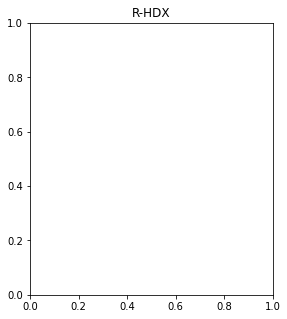

In [6]:
var_list = ['R', 'Q']
pu.plot_vars(rdf, var_list)


In [ ]:
var_list = ['s', 'r', 'q', 'p']
trader_df = agent_df[agent_df['agent_id'] == 'Trader']
pu.plot_vars(trader_df, var_list)


In [ ]:
# merge agent_df, rdf to one df on timesteps, run, etc

merged_df = pd.merge(agent_df, rdf, how="inner", on=["timestep", "simulation", "run", "subset", "substep"])

In [ ]:
# add IL column to agent DF, where val_hold is calculated using initial holdings from agent_d
merged_df['IL'] = merged_df.apply(lambda x: x['withdraw_val']/x['deposit_val'] - 1, axis=1)
merged_df['pool_loss'] = merged_df.apply(lambda x: x['pool_val']/2000000 - 1, axis=1)

merged_df[['timestep', 'agent_id', 'q','Q-R1', 's-R1','S-R1','r-R1','R-R1','pool_val', 'deposit_val','IL','withdraw_val', 'p-R1']].tail()

In [ ]:
merged_df[['timestep', 'agent_id', 'q','Q-R1','s-R1','S-R1','r-R1','R-R1','withdraw_val', 'deposit_val','IL','pool_val']].head()


## Conclusion



In [ ]:
var_list = ['pool_val', 'pool_loss', 'withdraw_val', 'deposit_val', 'IL', 'pool_loss']
LP1_merged_df = merged_df[merged_df['agent_id'] == 'LP1']
pu.plot_vars(LP1_merged_df, var_list)